sampling freq: 100.0
message signal: [-1 -1 -1 -1  1 -1  1  1  1 -1]


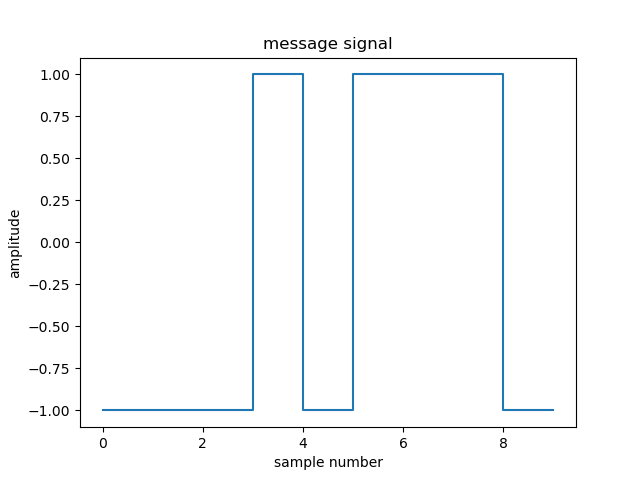

In [26]:
# direct sequence spread spectrum modulation with frequency shift keying modulation
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

plt.close("all")

# time signal with 100hz sampling rate
dt1 = 0.01
fs1 = 1/dt1
n1 = np.arange(0, 2*np.pi, dt1)
len1 = len(n1)
print("sampling freq:", fs1)

# message signal
x1 = np.random.randint(2, size=10)

# zeros should be -1 for demodulation
for i1 in range(len(x1)):
    if x1[i1] == 0:
        x1[i1] = -1

print("message signal:", x1)

plt.figure()
plt.step(range(len(x1)), x1)
plt.title("message signal")
plt.xlabel("sample number")
plt.ylabel("amplitude")
plt.show()

[1 0 0 1 1 1 0 1 0 1]


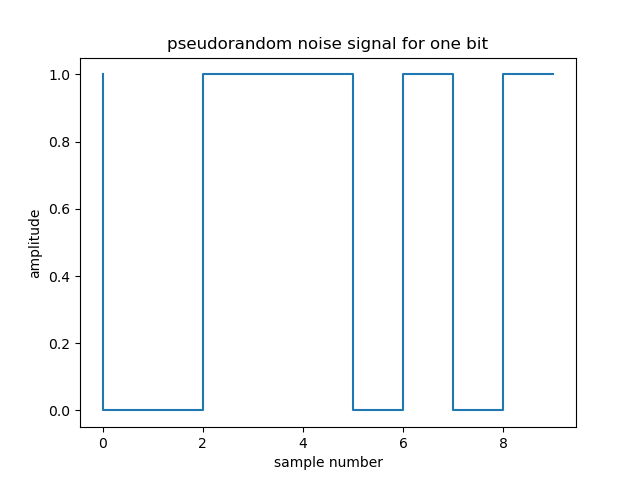

In [27]:
# pseudorandom noise for encryption
a1 = np.random.randint(2, size=10)
print(a1)

plt.figure()
plt.step(range(len(a1)), a1)
plt.title("pseudorandom noise signal for one bit")
plt.xlabel("sample number")
plt.ylabel("amplitude")
plt.show()

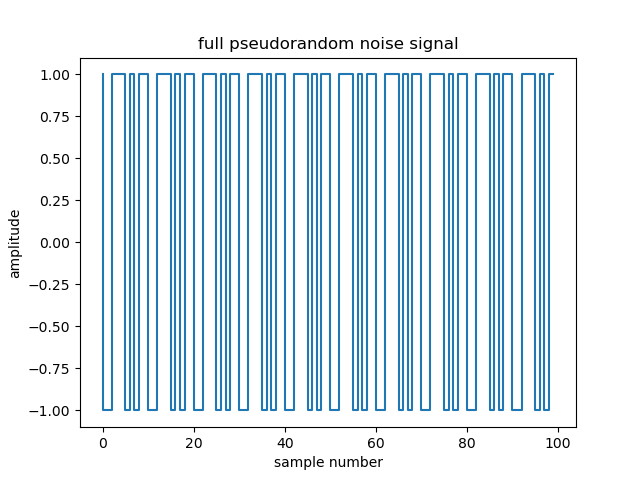

In [28]:
# full pseudorandom noise
pn1 = np.array([])
for i1 in range(10):
    pn1 = np.append(pn1, a1)

for i1 in range(len(pn1)):
    if pn1[i1] == 0:
        pn1[i1] = -1

plt.figure()
plt.step(range(len(pn1)), pn1)
plt.title("full pseudorandom noise signal")
plt.xlabel("sample number")
plt.ylabel("amplitude")
plt.show()

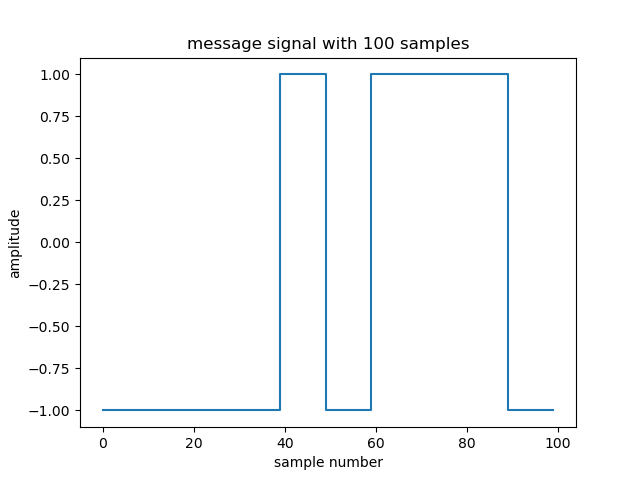

In [29]:
# same message signal with 100 samples for multiplying
x2 = np.repeat(x1, 10)

plt.figure()
plt.step(range(len(x2)), x2)
plt.title("message signal with 100 samples")
plt.xlabel("sample number")
plt.ylabel("amplitude")
plt.show()

100


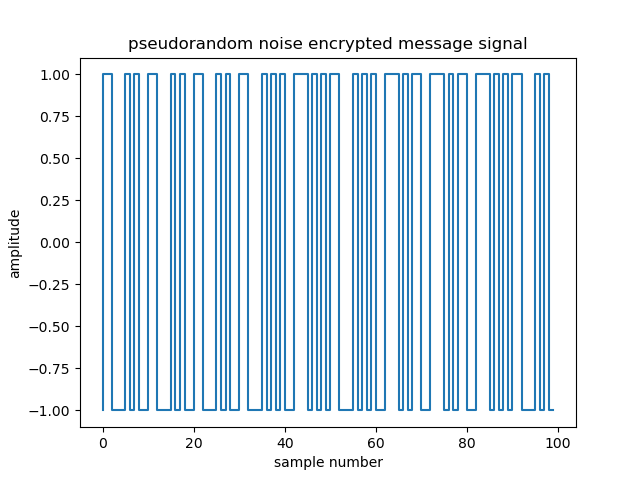

In [30]:
# pseudorandom noise encrypted message signal
# each message bit spreaded by 10 bits
modulated1 = x2 * pn1
print(len(modulated1))

plt.figure()
plt.step(range(len(modulated1)), modulated1)
plt.title("pseudorandom noise encrypted message signal")
plt.xlabel("sample number")
plt.ylabel("amplitude")
plt.show()

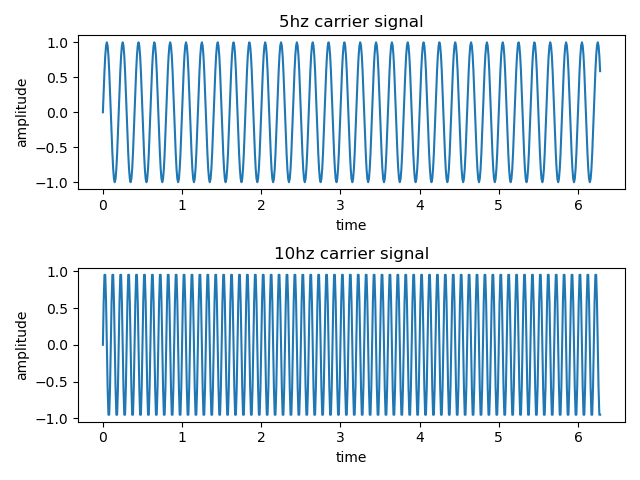

In [31]:
# carrier signals for frequency shift keying modulation
# 5hz for 1's
c1 = np.sin(5*2*np.pi*n1)
# 10hz for -1's
c2 = np.sin(10*2*np.pi*n1)

plt.figure()
plt.subplot(2,1,1)
plt.plot(n1, c1)
plt.title("5hz carrier signal")
plt.xlabel("time")
plt.ylabel("amplitude")

plt.subplot(2,1,2)
plt.plot(n1, c2)
plt.title("10hz carrier signal")
plt.xlabel("time")
plt.ylabel("amplitude")

plt.tight_layout()
plt.show()

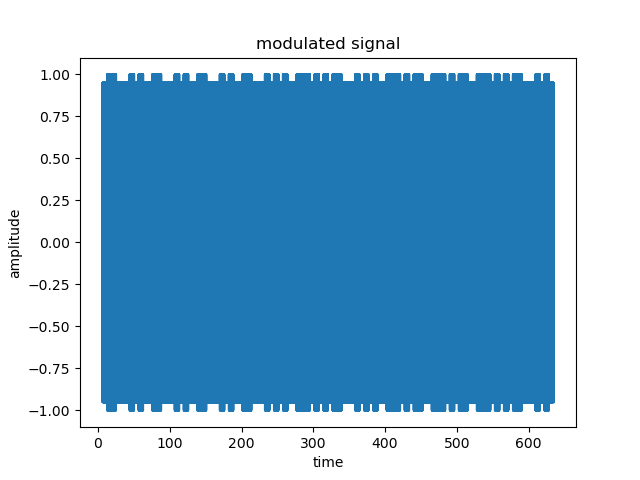

In [32]:
# initialize time signal for modulated signal
n2 = []
n2 = np.array(n2)

for i1 in range(100):
    a1 = n1 + ((i1+1)*2*np.pi)
    n2 = np.append(n2, a1)

# initialize modulated signal
s1 = []
s1 = np.array(s1)

for i1 in modulated1:
    if i1 == 1:
        s1 = np.append(s1, c1)
    elif i1 == -1:
        s1 = np.append(s1, c2)

plt.figure()
plt.plot(n2, s1)
plt.title("modulated signal")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

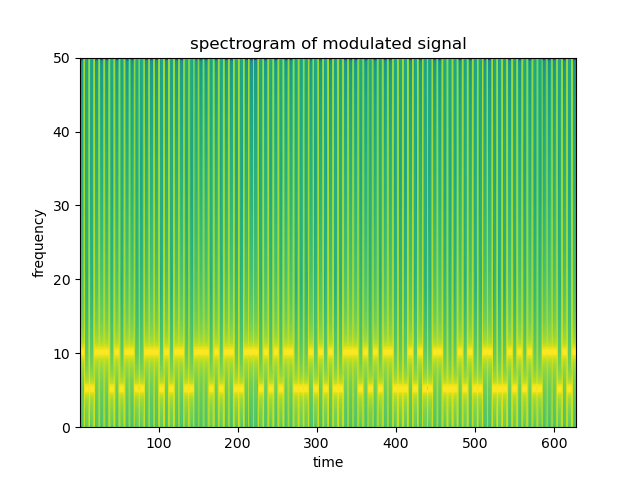

In [33]:
plt.figure()
plt.specgram(s1, Fs=fs1)
plt.title("spectrogram of modulated signal")
plt.xlabel("time")
plt.ylabel("frequency")
plt.show()